# Dead time

In the previous tutorial we started with a nonlinear system being controlled by a linear controller.  We chose to use our own integration loop instead of the built-in routines in `scipy.integrate` because `scipy` routines are not able to handle dead time in measurements.

We will now extend the simulation to include dead time.

Dead time is expressed mathematically as follows:

$$f_d(t) = f(t - D)$$

Where $f_d$ is the delayed version of $f$.

If we know the function, it's easy enough to generate "shifted" points:

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
import numpy

In [5]:
t = numpy.linspace(0, 10)
D = 1
f = numpy.sin(t)
f_d = numpy.sin(t - D)

<IPython.core.display.Javascript object>


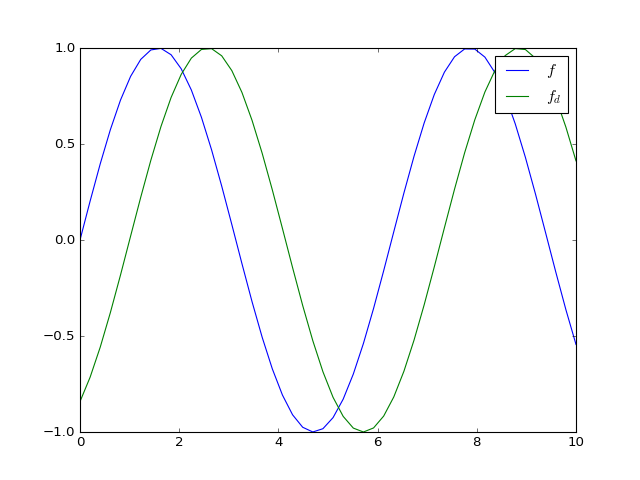

In [6]:
plt.plot(t, f, label='$f$' )
plt.plot(t, f_d, label='$f_d$')
plt.legend();

But what if we hadn't known the function? We could simply use interpolation! Remember in the code below, we don't use knowledge of the function which led to the data in $f$.

In [7]:
f_i = numpy.interp(t-D, t, f)

<IPython.core.display.Javascript object>


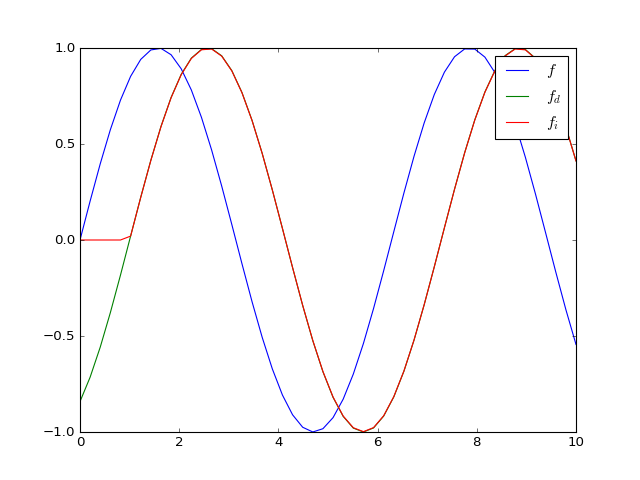

In [8]:
plt.figure()
plt.plot(t, f, label='$f$' )
plt.plot(t, f_d, label='$f_d$')
plt.plot(t, f_i, label='$f_i$')
plt.legend();

Notice that the default behaviour of `numpy.interp` is to use the first value in the table when looking up for values outside the table.

# Noise

In many cases, measurements have interference from a variety of sources. This kind of noise is often described as [white noise](https://en.wikipedia.org/wiki/White_noise) and is the kind of noise that you can hear on audio recordings. The function `numpy.random.randn` can be used to generate normally distributed noise signals:

In [9]:
noise = numpy.random.randn(len(t))

<IPython.core.display.Javascript object>


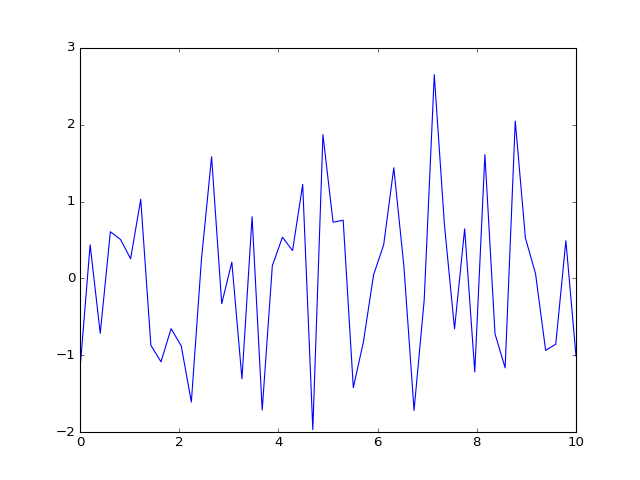

In [10]:
plt.figure()
plt.plot(t, noise)
plt.show()

# Simulation

Your **task** is to simulate the same system as in CT2, but with the ability to add dead time and noise to the measurement.

Parameters

In [11]:
import scipy.signal

Simulation:

In [12]:
A = 2
alpha = 20
K = 2

Fi = 1
ho = 1
V = A*ho
x0 = x = 0.7

def f(x):
    return alpha**(x - 1)

ts = numpy.linspace(0, 100, 1000)
dt = ts[1]

Kc = -1
tau_i = 5

Gc = scipy.signal.lti([Kc*tau_i, Kc], [tau_i, 0])

hsp = 1.3

std = 0.01

noise = numpy.random.randn(len(ts))


hs = numpy.zeros(len(ts))
xc = numpy.zeros([Gc.A.shape[0], 1])
hm_store = numpy.zeros(len(ts))
D = 0.9
for i, t in enumerate(ts):
    h = V/A

    #####
    ### Introduce the measurement delay and noise here
    #####
    t_interp = t - D
    hm = numpy.interp(t_interp, ts, hs) + noise[i]*std
    
    hm_store[i] = hm
    
    e = hsp - hm  # we cheat a little here - the level we use to calculate the error is from the previous time step
    
    # e is in the input to the controller, yc is the output
    dxcdt = Gc.A.dot(xc) + Gc.B.dot(e)
    yc = Gc.C.dot(xc) + Gc.D.dot(e)
    
    x = x0 + yc[0,0]  # x0 is the controller bias
    
    Fo = K*f(x)*numpy.sqrt(h)
    dVdt = Fi - Fo
    
    V += dVdt*dt
    xc += dxcdt*dt
    
    hs[i] = h

<IPython.core.display.Javascript object>


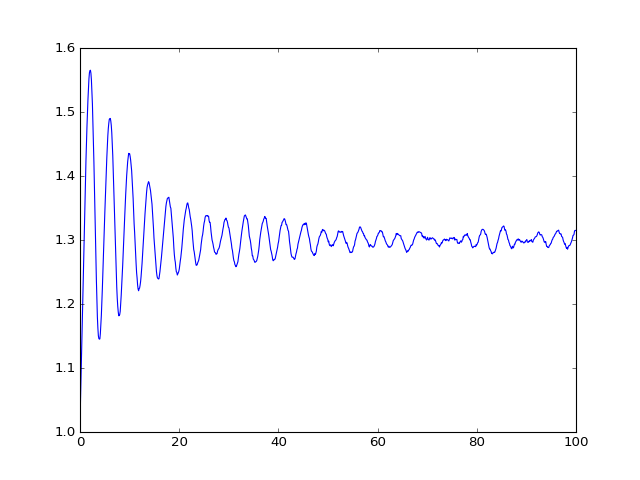

In [13]:
plt.figure()
plt.plot(ts, hs)
plt.show()